       Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   5.790000                74.990000   
std                    2.825908                14.033506   
min                    1.000000                50.000000   
25%                    3.000000                62.000000   
50%                    6.000000                77.000000   
75%                    8.000000                86.500000   
max                   10.000000                98.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                     100.000000                            100.000000   
mean                        2.670000                              8.680000   
std                         2.064882                              6.340315   
min                         0.000000                              0.000000   
25%                         1.000000                              2.0

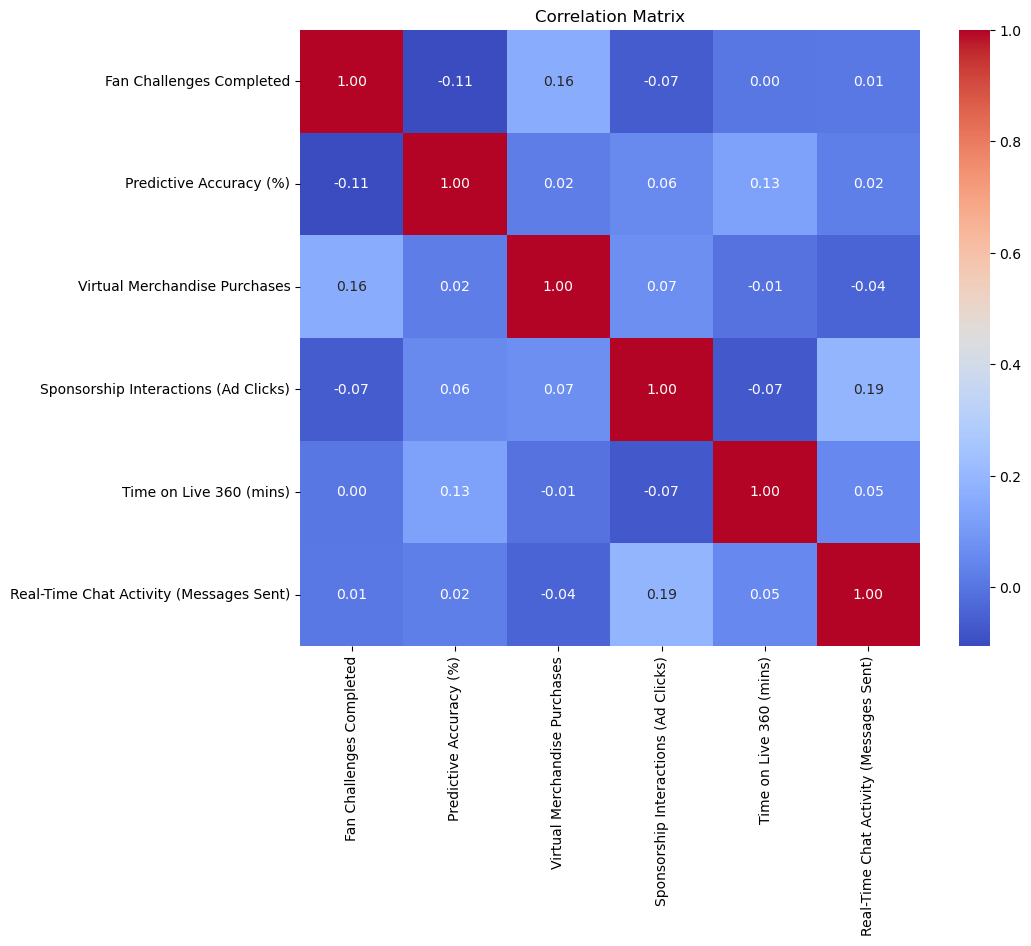

Potential Purchasers:
   User ID  Virtual Merchandise Purchases
0     U001                              3
4     U005                              5
5     U006                              6
6     U007                              4
10    U011                              6
12    U013                              5
14    U015                              3
16    U017                              5
19    U020                              3
20    U021                              3
21    U022                              5
22    U023                              6
26    U027                              4
33    U034                              3
34    U035                              5
35    U036                              6
36    U037                              4
40    U041                              5
42    U043                              4
43    U044                              3
45    U046                              5
46    U047                              6
47    U048  

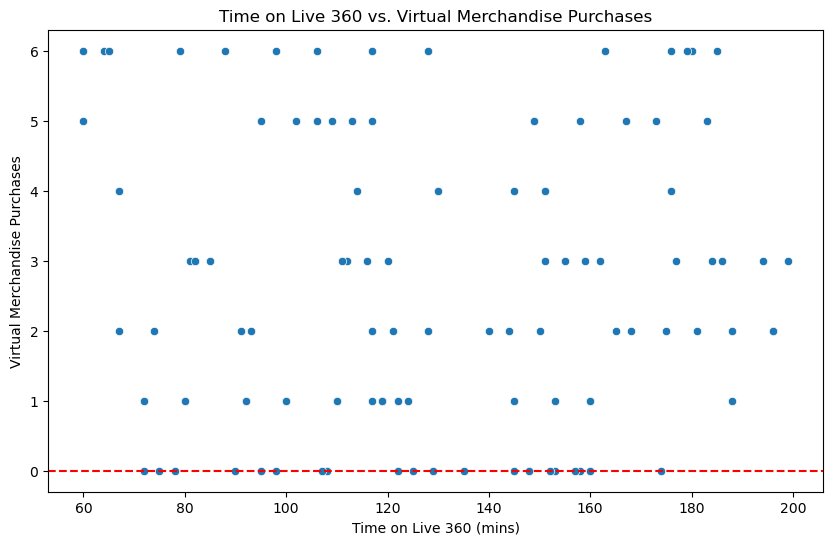

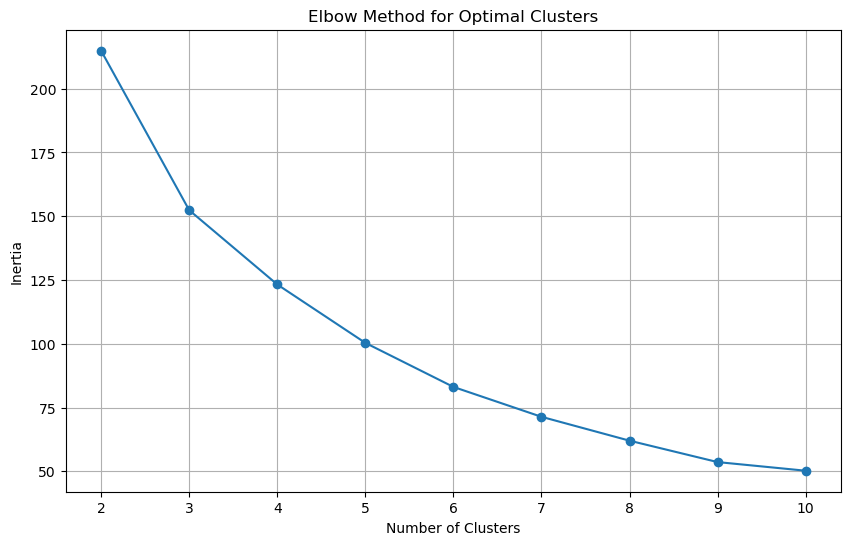

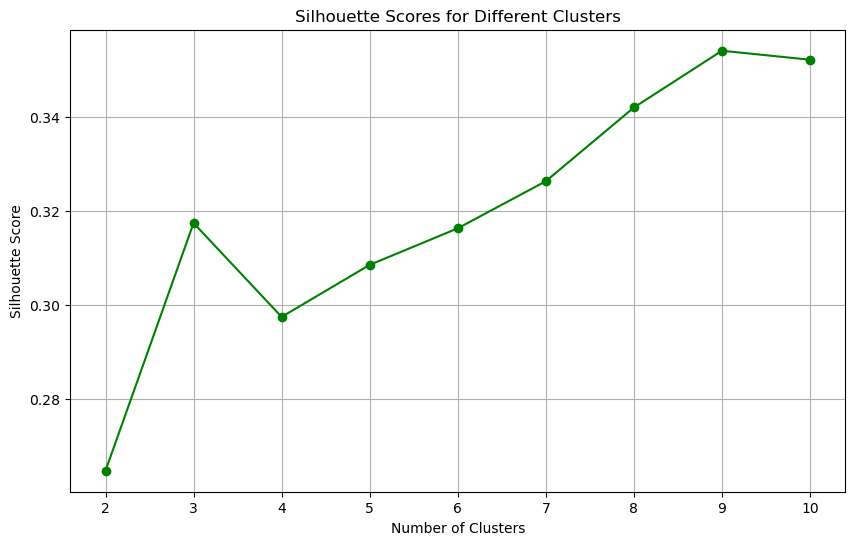

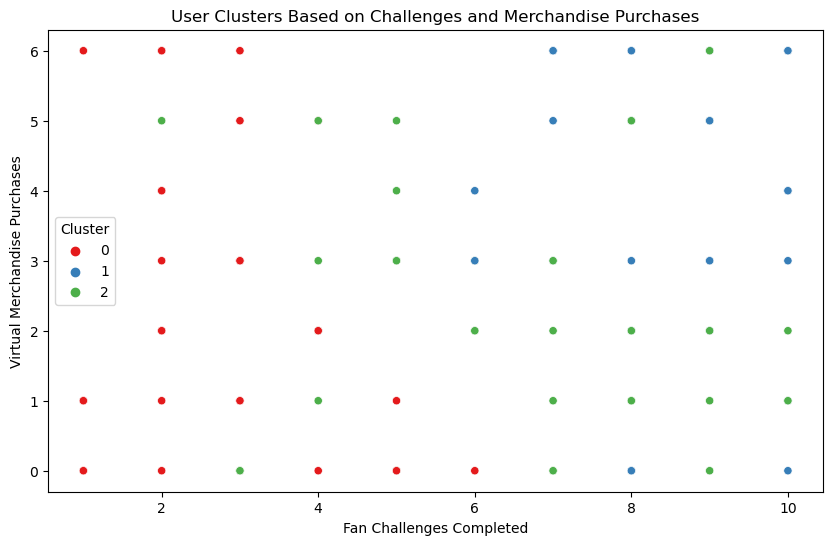


Proposed New Fan Challenge:
{'Challenge Name': 'Live 360 Engagement Challenge', 'Objective': 'Boost user engagement during live events.', 'Details': 'Encourage participation in live polls and discussions to earn points redeemable for exclusive virtual merchandise.', 'Predicted Outcomes': {'Increased Merchandise Purchases': 'Estimated 20% increase.', 'Higher Engagement Rates': 'Expected 15% more participation in live events.'}}


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load and preprocess the data
try:
    data = pd.read_csv('2025xtern.csv')
except FileNotFoundError:
    print("Error: The file '2025xtern.csv' was not found. Please check the file path.")
    exit()

# Remove any rows with missing values to ensure data quality
data = data.dropna()
data['User ID'] = data['User ID'].astype(str)  # Convert User ID to string for easier handling

# Quick EDA to understand the dataset better
print(data.describe())  # Display summary statistics for numerical columns

# Create a correlation heatmap to visualize relationships between variables
correlation_matrix = data.corr(numeric_only=True)  # Fix to suppress FutureWarning
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify users who are potential purchasers based on their virtual merchandise purchases
purchasing_threshold = 2  # Define a threshold for what counts as a purchaser
purchasers = data[data['Virtual Merchandise Purchases'] > purchasing_threshold]
print("Potential Purchasers:")
print(purchasers[['User ID', 'Virtual Merchandise Purchases']])

# Investigate the relationship between time spent on "Live 360" and merchandise purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Time on Live 360 (mins)', y='Virtual Merchandise Purchases')
plt.title('Time on Live 360 vs. Virtual Merchandise Purchases')
plt.xlabel('Time on Live 360 (mins)')
plt.ylabel('Virtual Merchandise Purchases')
plt.axhline(y=0, color='r', linestyle='--')  # Add a reference line at y=0 for clarity
plt.show()

# K-Means Clustering to segment users
features = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Standardize features for better clustering

# Use the elbow method to determine the optimal number of clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Testing different cluster sizes from 2 to 10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)  # Track inertia for elbow method
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))  # Calculate silhouette score

# Plotting the results of the elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Plotting silhouette scores to assess clustering quality
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='g')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Choose the optimal number of clusters based on previous analyses
optimal_clusters = 3  # Set this after analyzing elbow and silhouette plots
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(features_scaled)  # Assign clusters to the data

# Visualize the clustered data to understand user segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Fan Challenges Completed', y='Virtual Merchandise Purchases', hue='Cluster', palette='Set1')
plt.title('User Clusters Based on Challenges and Merchandise Purchases')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Virtual Merchandise Purchases')
plt.legend(title='Cluster')
plt.show()

# Propose a new fan challenge based on insights gained
proposed_challenge = {
    'Challenge Name': 'Live 360 Engagement Challenge',
    'Objective': 'Boost user engagement during live events.',
    'Details': 'Encourage participation in live polls and discussions to earn points redeemable for exclusive virtual merchandise.',
    'Predicted Outcomes': {
        'Increased Merchandise Purchases': 'Estimated 20% increase.',
        'Higher Engagement Rates': 'Expected 15% more participation in live events.'
    }
}

print("\nProposed New Fan Challenge:")
print(proposed_challenge)
